<a href="https://colab.research.google.com/github/sessihode/Projet1/blob/main/projet_AHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit pandas matplotlib seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [2]:
!pip install pyngrok --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

In [4]:
# Génération des données simulées
import pandas as pd
import random
from datetime import datetime, timedelta

def generate_fake_data(num_days=7, num_entries_per_day=48):
    equipment = ['Bus piste #1', 'Trepel élévateur', 'Tracteur G750', 'Tapis roulant #2', 'Cobus 3000']
    statuses = ['actif', 'inactif', 'maintenance', 'panne']
    base_time = datetime.now() - timedelta(days=num_days)  # Correction ici (days=num_days)
    data = []

    for i in range(num_days * num_entries_per_day):
        timestamp = base_time + timedelta(minutes=30 * i)
        equip = random.choice(equipment)
        status = random.choices(statuses, weights=[0.6, 0.2, 0.15, 0.05])[0]  # Somme=1
        duration = random.randint(10, 60) if status == 'actif' else 0
        battery = max(0, min(100, random.randint(20, 100) - int(duration / 2)))
        location = random.choice(['Piste A', 'Piste B', 'Parking 1', 'Parking 2'])

        data.append([
            equip,
            timestamp.date(),
            timestamp.time(),
            status,
            duration,
            battery,
            location
        ])

    # Correction : utiliser une liste pour les colonnes et nom correct
    return pd.DataFrame(data, columns=[
        'Equipment',
        'Date',
        'Heure',
        'Statut',
        'Duree_utilisation_min',  # Orthographe corrigée
        'Batterie_%',
        'Emplacement'
    ])

# Test
df = generate_fake_data()
df.head()

,Equipment,Date,Heure,Statut,Duree_utilisation_min,Batterie_%,Emplacement
0,Trepel élévateur,2025-07-12,01:13:26.252739,panne,0,57,Parking 1
1,Trepel élévateur,2025-07-12,01:43:26.252739,actif,48,58,Parking 1
2,Bus piste #1,2025-07-12,02:13:26.252739,actif,12,19,Piste B
3,Trepel élévateur,2025-07-12,02:43:26.252739,actif,16,31,Parking 2
4,Tapis roulant #2,2025-07-12,03:13:26.252739,actif,10,79,Piste A


In [5]:
# Création du jeu de données

df = generate_fake_data()
df['Heure_int'] = df['Heure'].apply(lambda x: int(str(x)[:2]))

In [6]:
# Affichage du jeu de données

print("Aperçu des données :")
df.head()

Aperçu des données :


,Equipment,Date,Heure,Statut,Duree_utilisation_min,Batterie_%,Emplacement,Heure_int
0,Tapis roulant #2,2025-07-12,01:13:26.294263,maintenance,0,64,Parking 2,1
1,Tracteur G750,2025-07-12,01:43:26.294263,actif,20,51,Piste A,1
2,Cobus 3000,2025-07-12,02:13:26.294263,actif,43,78,Piste A,2
3,Cobus 3000,2025-07-12,02:43:26.294263,actif,56,44,Piste B,2
4,Tracteur G750,2025-07-12,03:13:26.294263,actif,41,21,Piste A,3



Utilisation moyenne par équipement :
Equipment
Bus piste #1        22.903226
Cobus 3000          17.742857
Tapis roulant #2    20.447761
Tracteur G750       22.115942
Trepel élévateur    22.941176
Name: Duree_utilisation_min, dtype: float64

Taux de fonctionnement par équipement :
Statut               actif   inactif  maintenance     panne
Equipment                                                  
Bus piste #1      0.612903  0.177419     0.161290  0.048387
Cobus 3000        0.514286  0.242857     0.171429  0.071429
Tapis roulant #2  0.597015  0.134328     0.164179  0.104478
Tracteur G750     0.652174  0.144928     0.144928  0.057971
Trepel élévateur  0.602941  0.102941     0.176471  0.117647

Carte thermique de l'utilisation :


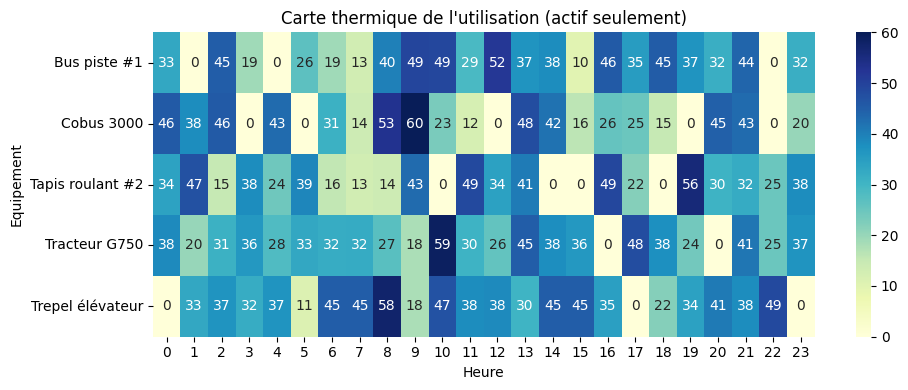

In [8]:
# Analyse 1 : Moyenne d'utilisation par équipement

print("\nUtilisation moyenne par équipement :")
print(df.groupby("Equipment")["Duree_utilisation_min"].mean())

# Analyse 2 : Taux de fonctionnement

print("\nTaux de fonctionnement par équipement :")
print(pd.crosstab(df['Equipment'], df['Statut'], normalize='index'))

# Analyse 3 : Carte thermique de l'utilisation

print("\nCarte thermique de l'utilisation :")
heatmap_data = pd.pivot_table(df[df['Statut']=='actif'], index='Equipment', columns='Heure_int', values='Duree_utilisation_min', aggfunc='mean').fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Carte thermique de l'utilisation (actif seulement)")
plt.xlabel("Heure")
plt.ylabel("Equipement")
plt.tight_layout()
plt.show()


In [9]:
# Optionnel : Sauvegarde du jeu de données

df.to_csv("ahs_benin_data.csv", index=False)